Limpieza de datos requerida para que el algoritmo funcione

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('../datos/Food_Delivery_Times.csv')

df = df.dropna()

cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    if df[col].nunique() <= 5:
        df[col] = le.fit_transform(df[col])
    else:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
num_cols = df.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Ejecucion del algoritmo Ada Boost

In [18]:
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
ada_model = AdaBoostRegressor(
    estimator=base_tree,
    n_estimators=1000,
    learning_rate=0.1,
    random_state=100
)
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Resultados:")
print(f"MAE:  {mae:.4f}") #Promedio del error absoluto entre los valores reales y los predichos
print(f"RMSE: {rmse:.4f}") #Promedio del error cuadrático, el que penaliza más los errores grandes
print(f"R²:   {r2:.4f}") #Indica qué tan bien el modelo explica la variabilidad de los datos

Resultados:
MAE:  0.4042
RMSE: 0.5114
R²:   0.7027


Visualizacion del algoritmo

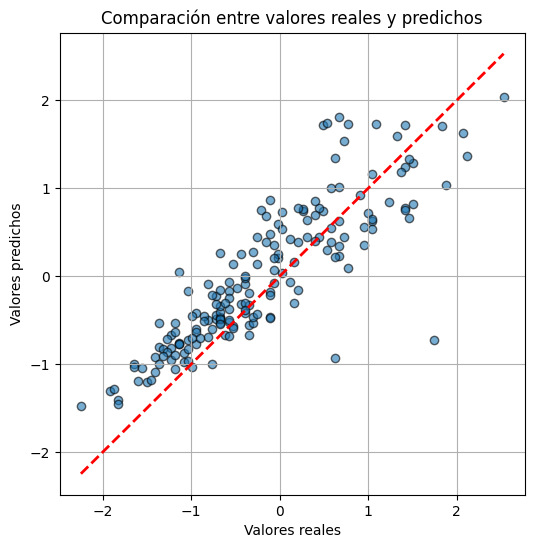

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # "predicción perfecta"
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Comparación entre valores reales y predichos")
plt.grid(True)
plt.show()
